In [1]:
import json

# Cargar el archivo JSON del notebook
with open('categorias.ipynb', 'r', encoding='utf-8') as file:
    notebook_content = json.load(file)

# Extraer las celdas
cells = notebook_content['cells']

# Filtrar solo las celdas de tipo markdown
markdown_cells = [cell for cell in cells if cell['cell_type'] == 'markdown']

# Extraer el contenido de las celdas markdown
markdown_content = [cell['source'] for cell in markdown_cells]

# Mostrar las primeras celdas para entender su estructura
for cell in markdown_content[:5]:
    print(cell)

['# Modelo de riesgo']
['## Paquetes']
['## Datos']
['## Limpiesa de datos']
['### Giros']


In [3]:
from anytree import Node, RenderTree
import re

# Función auxiliar para extraer el nivel y texto de los encabezados
def extract_header_info(header_line):
    level = len(re.match(r'#+', header_line).group(0))
    text = header_line[level:].strip()
    return level, text

# Nodo raíz
root = Node("Root")

# Pila para rastrear el nodo actual en cada nivel
node_stack = [root]

# Parsear el contenido markdown para construir el árbol
for cell in markdown_content:
    for line in cell:
        if line.startswith('#'):
            level, text = extract_header_info(line)
            while len(node_stack) > level:
                node_stack.pop()
            new_node = Node(text, parent=node_stack[-1])
            node_stack.append(new_node)

# Renderizar la estructura del árbol
for pre, fill, node in RenderTree(root):
    print(f"{pre}{node.name}")

Root
└── Modelo de riesgo
    ├── Paquetes
    ├── Datos
    └── Limpiesa de datos
        └── Giros


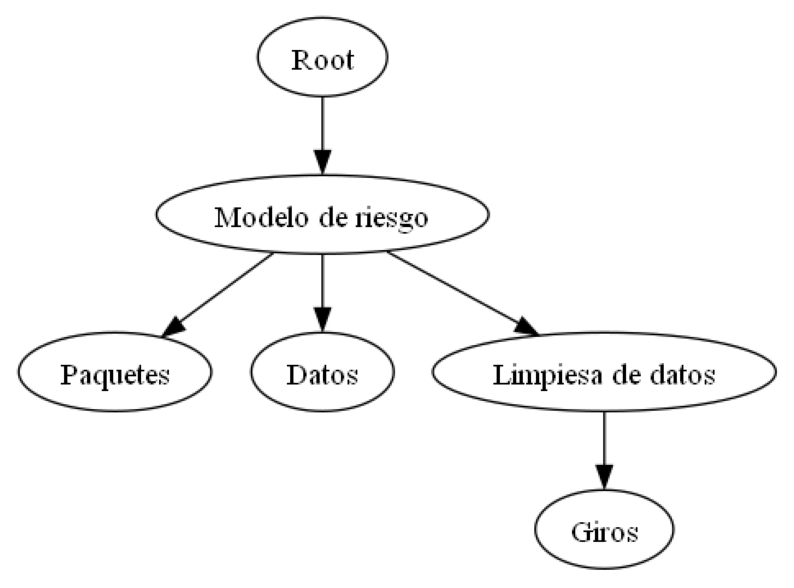

In [4]:
import matplotlib.pyplot as plt
from anytree.exporter import DotExporter

# Exportar el árbol a un archivo .dot
DotExporter(root).to_picture("dendrogram.png")

# Mostrar la imagen del dendrograma
img = plt.imread("dendrogram.png")
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('off')
plt.show()